In [1]:
import pandas as pd
import seaborn as sns
import random
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data = data[data['Glucose'] != 0]
data = data[data['BloodPressure'] != 0]
data = data[data['SkinThickness'] != 0]
data = data[data['Insulin'] != 0]
data = data[data['BMI'] != 0]
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


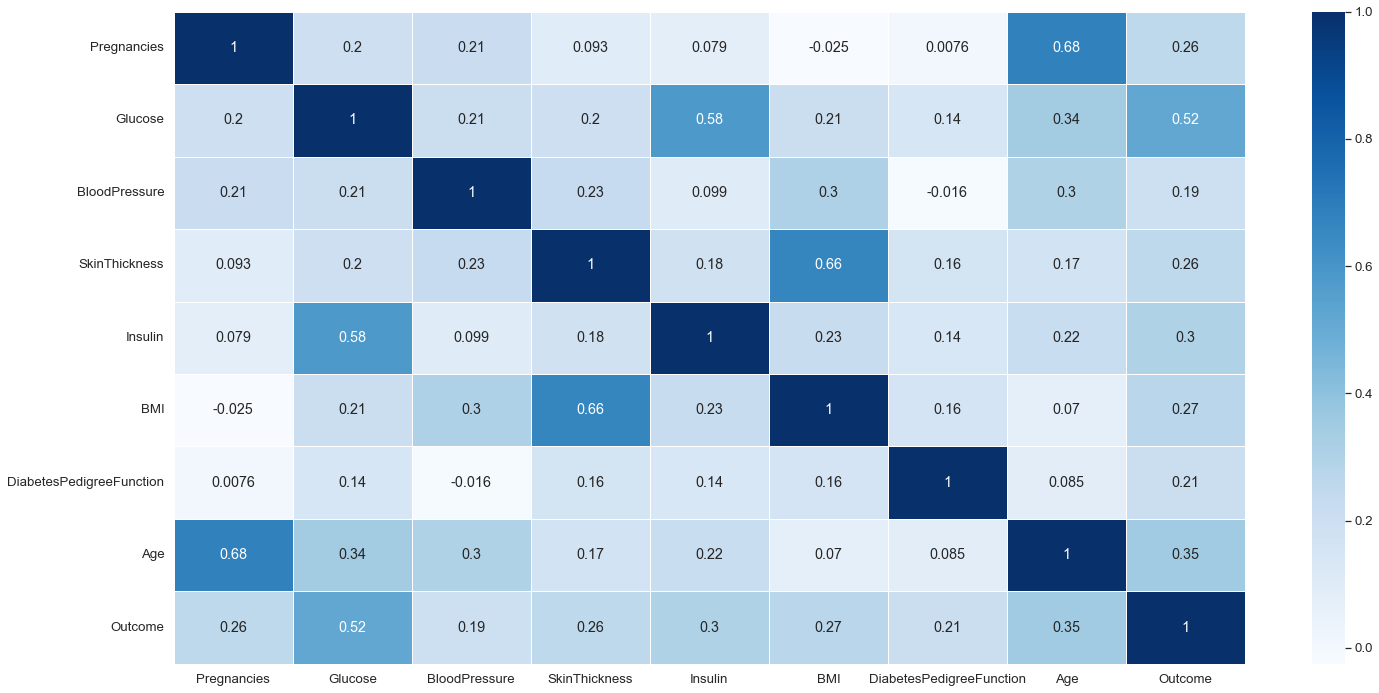

In [6]:
corr = data.corr()
sns.set(font_scale=1.2)
_, ax = plt.subplots(figsize = (24, 12))
sns.heatmap(corr, annot=True, cmap='Blues', linewidths=1, ax=ax)
plt.show()

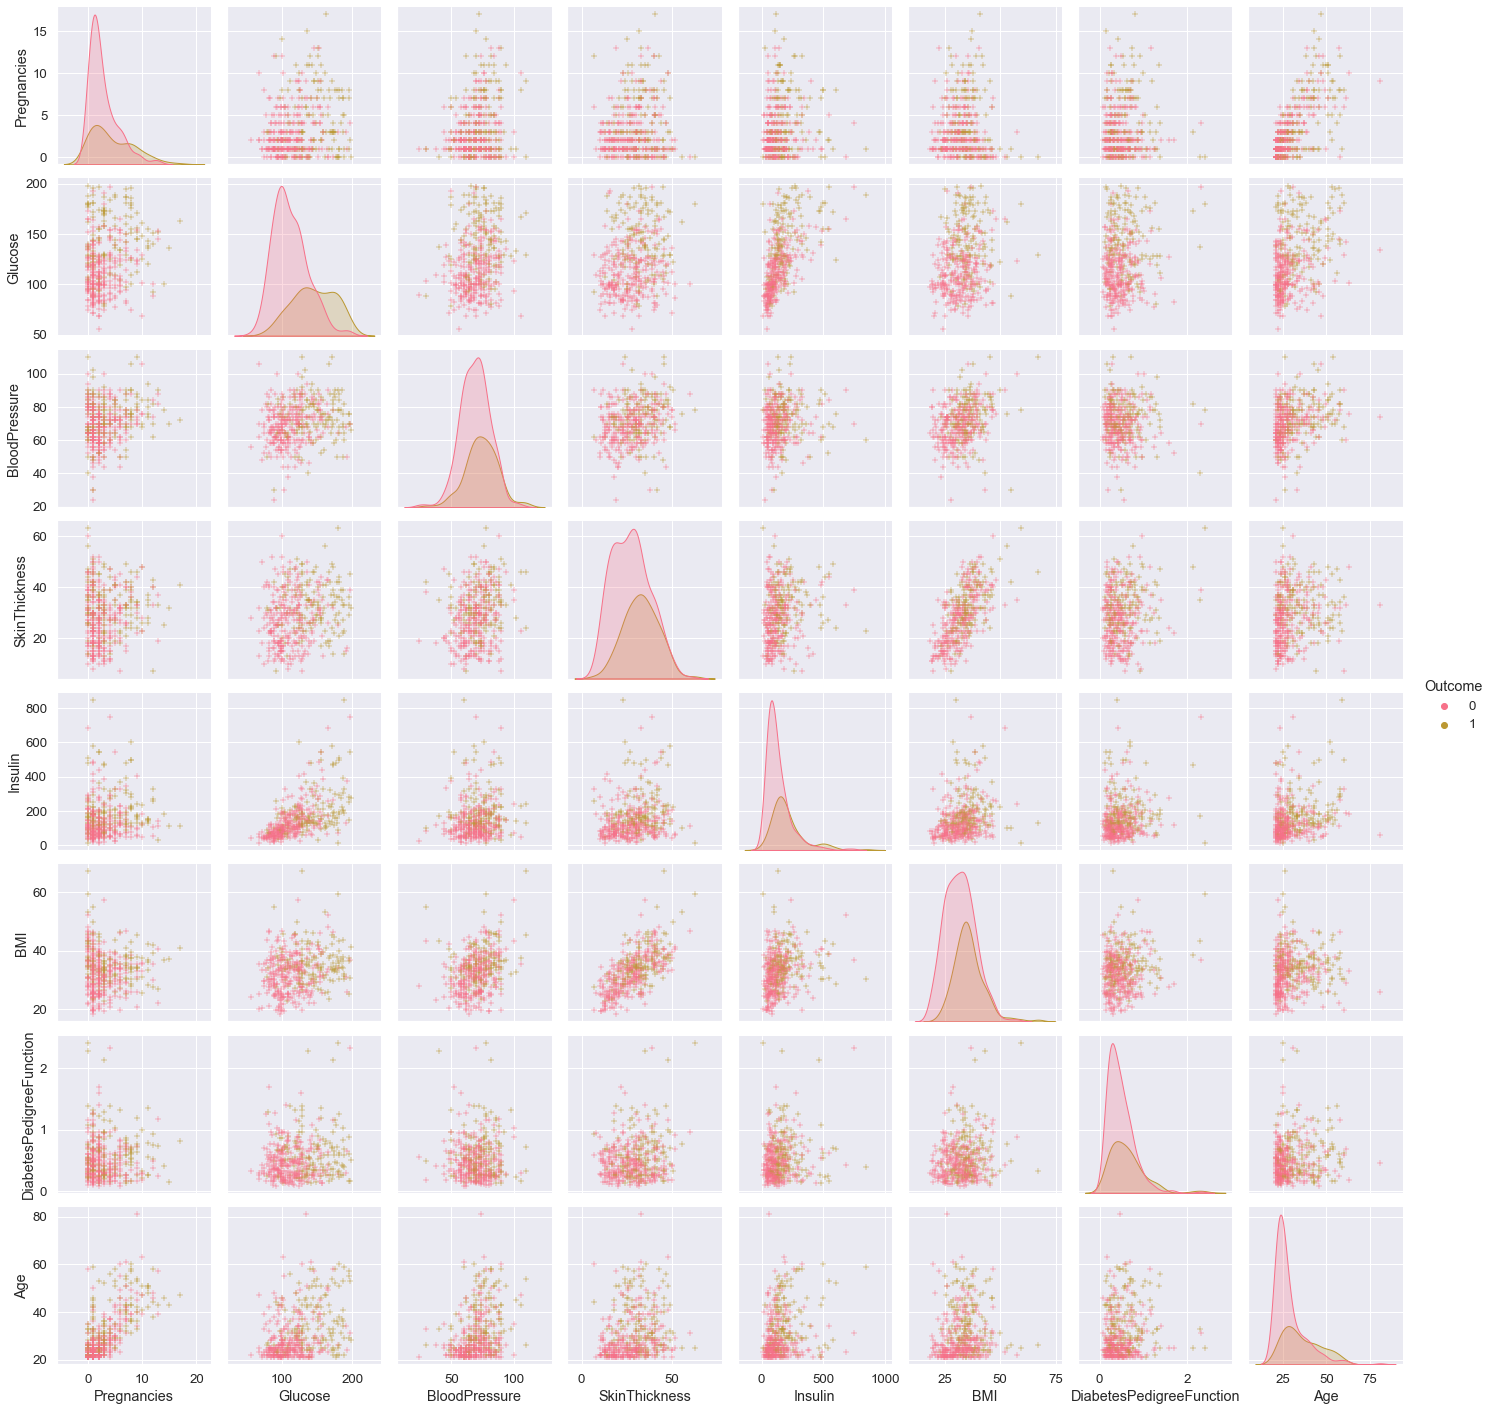

In [7]:
sns.set_palette('husl')
sns.pairplot(data, hue='Outcome', markers='+')

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

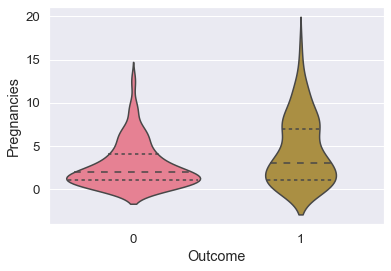

In [8]:
sns.violinplot(y='Pregnancies', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

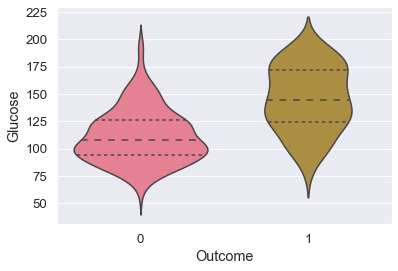

In [9]:
sns.violinplot(y='Glucose', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

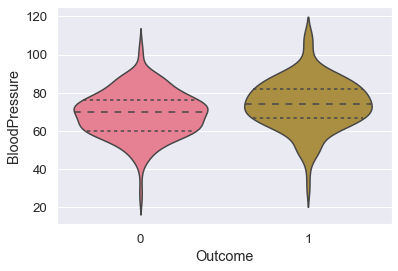

In [10]:
sns.violinplot(y='BloodPressure', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

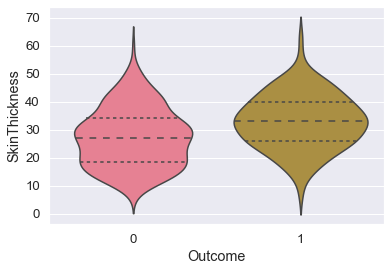

In [11]:
sns.violinplot(y='SkinThickness', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

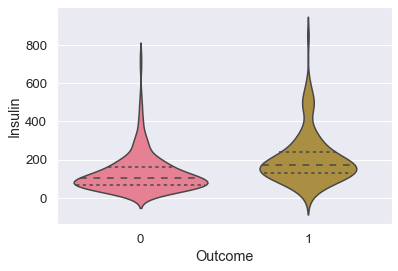

In [12]:
sns.violinplot(y='Insulin', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

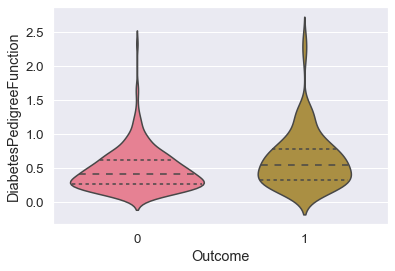

In [13]:
sns.violinplot(y='DiabetesPedigreeFunction', x='Outcome', inner='quartile', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

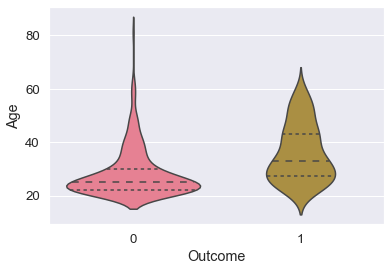

In [14]:
sns.violinplot(y='Age', x='Outcome', inner='quartile', data=data)

In [15]:
# Klasa statyczna zawierająca metody przydatne to przetwarzania danych
class ProcessingData:

    # metoda tasująca wiersze pd.DataFrame
    @staticmethod
    def shuffle(df: pd.DataFrame) -> pd.DataFrame:
        """
        Receives a DataFrame, randomly shuffles it and returns a shuffled version.
        :param df: pd.DataFrame
        :return df: pd.DataFrame
        """
        for idx in range(len(df) - 1, 0, -1):
            rand_idx = random.randint(0, idx)
            df.iloc[idx], df.iloc[rand_idx] = df.iloc[rand_idx], df.iloc[idx]
        return df.reset_index(drop=True)

    # metoda normalizująca kolumny pd.DataFrame za pomocą normalizacji z użyciem odchylenia standardowego
    @staticmethod
    def normalize_std(df: pd.DataFrame, label: str) -> pd.DataFrame:
        """
        Receives a DataFrame and a class label to skip during normalization, normalizes data using min-max normalization and returns the normalized version.
        :param label: str
        :param df: pd.DataFrame
        :return df: pd.DataFrame
        """
        normalized = df.drop(labels=label, axis=1)
        normalized = (normalized-normalized.mean())/(normalized.std())
        return normalized.join(df[label])

    # metoda normalizująca kolumny pd.DataFrame za pomocą normalizacji minmax
    @staticmethod
    def normalize_minmax(df: pd.DataFrame, label: str) -> pd.DataFrame:
        """
        Receives a DataFrame and a class label to skip during normalization, normalizes data using min-max normalization and returns the normalized version.
        :param label: str
        :param df: pd.DataFrame
        :return df: pd.DataFrame
        """
        normalized = df.drop(labels=label, axis=1)
        normalized = (normalized-normalized.min())/(normalized.max()-normalized.min())
        return normalized.join(df[label])

    # metoda dzieląca pd.DataFrame na zbiór treningowy oraz walidacyjny
    @staticmethod
    def split(df: pd.DataFrame, ratio: float) -> tuple[pd.DataFrame, pd.DataFrame]:
        """
        Receives a DataFrame and returns two dataframes, split into training and validation DataFrames.
        :param df: pd.DataFrame
        :param ratio: float
        :return training_df, validation_df: tuple[pd.DataFrame, pd.DataFrame]
        """
        cutoff = int(len(df) * ratio)
        return df[:cutoff].reset_index(drop=True), df[cutoff:].reset_index(drop=True)

In [16]:
# Test metod klasy ProcessingData
shuffled_data = ProcessingData.shuffle(data)
shuffled_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,134,74,33,60,25.9,0.460,81,0
1,3,89,74,16,85,30.4,0.551,38,0
2,0,102,86,17,105,29.3,0.695,27,0
3,4,173,70,14,168,29.7,0.361,33,1
4,2,108,52,26,63,32.5,0.318,22,0
...,...,...,...,...,...,...,...,...,...
387,1,95,74,21,73,25.9,0.673,36,0
388,8,196,76,29,280,37.5,0.605,57,1
389,0,138,60,35,167,34.6,0.534,21,1
390,1,119,54,13,50,22.3,0.205,24,0


In [17]:
normalized_data_std = ProcessingData.normalize_std(shuffled_data, 'Outcome')
normalized_data_std

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.774596,0.368508,0.267022,0.366531,-0.808270,-1.022563,-0.182484,4.914842,0
1,-0.093734,-1.089653,0.267022,-1.249988,-0.597906,-0.382236,0.080912,0.699477,0
2,-1.027899,-0.668407,1.227323,-1.154899,-0.429615,-0.538760,0.497714,-0.378873,0
3,0.217654,1.632248,-0.053078,-1.440167,0.100502,-0.481842,-0.469035,0.209318,1
4,-0.405123,-0.473985,-1.493528,-0.299095,-0.783026,-0.083417,-0.593496,-0.869031,0
...,...,...,...,...,...,...,...,...,...
387,-0.716511,-0.895232,0.267022,-0.774542,-0.698880,-1.022563,0.434036,0.503413,0
388,1.463207,2.377531,0.427072,-0.013827,1.042933,0.628058,0.237212,2.562080,1
389,-1.027899,0.498122,-0.853328,0.556709,0.092088,0.215403,0.031706,-0.967063,1
390,-0.716511,-0.117546,-1.333478,-1.535257,-0.892415,-1.534825,-0.920570,-0.672968,0


In [18]:
# Test dla normalizacji std
normalized_training_data_std, normalized_validation_data_std = ProcessingData.split(normalized_data_std, 0.7)
normalized_training_data_std

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.774596,0.368508,0.267022,0.366531,-0.808270,-1.022563,-0.182484,4.914842,0
1,-0.093734,-1.089653,0.267022,-1.249988,-0.597906,-0.382236,0.080912,0.699477,0
2,-1.027899,-0.668407,1.227323,-1.154899,-0.429615,-0.538760,0.497714,-0.378873,0
3,0.217654,1.632248,-0.053078,-1.440167,0.100502,-0.481842,-0.469035,0.209318,1
4,-0.405123,-0.473985,-1.493528,-0.299095,-0.783026,-0.083417,-0.593496,-0.869031,0
...,...,...,...,...,...,...,...,...,...
269,1.774596,0.724948,0.747172,1.602692,-0.219251,0.684976,0.329835,0.895540,1
270,0.840431,-0.571196,-0.053078,0.271441,-0.740953,-0.325318,-1.160810,0.601445,0
271,-0.716511,-0.020335,1.547423,2.078139,0.538059,2.364055,-0.573235,0.013254,1
272,-0.405123,0.757351,0.427072,0.556709,0.319281,0.727664,-0.561657,-0.182809,0


In [19]:
normalized_validation_data_std

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.716511,-1.251671,-0.533228,-0.584363,-0.345469,0.542681,-0.150645,-0.280841,0
1,-1.027899,-0.149949,1.067272,1.697782,0.622205,1.809105,0.080912,0.013254,1
2,1.151819,-0.830425,0.427072,0.271441,-0.547418,1.111860,1.007138,0.111286,1
3,-0.093734,-0.376774,1.547423,-1.630346,-0.656808,-0.666826,-0.081178,-0.182809,0
4,1.151819,-0.668407,0.267022,1.032156,-0.429615,0.585369,-0.923464,1.385699,0
...,...,...,...,...,...,...,...,...,...
113,-0.716511,-0.895232,0.267022,-0.774542,-0.698880,-1.022563,0.434036,0.503413,0
114,1.463207,2.377531,0.427072,-0.013827,1.042933,0.628058,0.237212,2.562080,1
115,-1.027899,0.498122,-0.853328,0.556709,0.092088,0.215403,0.031706,-0.967063,1
116,-0.716511,-0.117546,-1.333478,-1.535257,-0.892415,-1.534825,-0.920570,-0.672968,0


In [20]:
normalized_data_minmax = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
normalized_data_minmax

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.529412,0.549296,0.581395,0.464286,0.055288,0.157464,0.160600,1.000000,0
1,0.176471,0.232394,0.581395,0.160714,0.085337,0.249489,0.199572,0.283333,0
2,0.000000,0.323944,0.720930,0.178571,0.109375,0.226994,0.261242,0.100000,0
3,0.235294,0.823944,0.534884,0.125000,0.185096,0.235174,0.118201,0.200000,1
4,0.117647,0.366197,0.325581,0.339286,0.058894,0.292434,0.099786,0.016667,0
...,...,...,...,...,...,...,...,...,...
387,0.058824,0.274648,0.581395,0.250000,0.070913,0.157464,0.251820,0.250000,0
388,0.470588,0.985915,0.604651,0.392857,0.319712,0.394683,0.222698,0.600000,1
389,0.000000,0.577465,0.418605,0.500000,0.183894,0.335378,0.192291,0.000000,1
390,0.058824,0.443662,0.348837,0.107143,0.043269,0.083845,0.051392,0.050000,0


In [21]:
# Test dla normalizacji minmax
normalized_training_data_minmax, normalized_validation_data_minmax = ProcessingData.split(normalized_data_minmax, 0.7)
normalized_training_data_minmax

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.529412,0.549296,0.581395,0.464286,0.055288,0.157464,0.160600,1.000000,0
1,0.176471,0.232394,0.581395,0.160714,0.085337,0.249489,0.199572,0.283333,0
2,0.000000,0.323944,0.720930,0.178571,0.109375,0.226994,0.261242,0.100000,0
3,0.235294,0.823944,0.534884,0.125000,0.185096,0.235174,0.118201,0.200000,1
4,0.117647,0.366197,0.325581,0.339286,0.058894,0.292434,0.099786,0.016667,0
...,...,...,...,...,...,...,...,...,...
269,0.529412,0.626761,0.651163,0.696429,0.139423,0.402863,0.236403,0.316667,1
270,0.352941,0.345070,0.534884,0.446429,0.064904,0.257669,0.015846,0.266667,0
271,0.058824,0.464789,0.767442,0.785714,0.247596,0.644172,0.102784,0.166667,1
272,0.117647,0.633803,0.604651,0.500000,0.216346,0.408998,0.104497,0.133333,0


In [22]:
normalized_validation_data_minmax

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.058824,0.197183,0.465116,0.285714,0.121394,0.382413,0.165310,0.116667,0
1,0.000000,0.436620,0.697674,0.714286,0.259615,0.564417,0.199572,0.166667,1
2,0.411765,0.288732,0.604651,0.446429,0.092548,0.464213,0.336617,0.183333,1
3,0.176471,0.387324,0.767442,0.089286,0.076923,0.208589,0.175589,0.133333,0
4,0.411765,0.323944,0.581395,0.589286,0.109375,0.388548,0.050964,0.400000,0
...,...,...,...,...,...,...,...,...,...
113,0.058824,0.274648,0.581395,0.250000,0.070913,0.157464,0.251820,0.250000,0
114,0.470588,0.985915,0.604651,0.392857,0.319712,0.394683,0.222698,0.600000,1
115,0.000000,0.577465,0.418605,0.500000,0.183894,0.335378,0.192291,0.000000,1
116,0.058824,0.443662,0.348837,0.107143,0.043269,0.083845,0.051392,0.050000,0


In [23]:
# Klasa NaiveBayes zawierająca klasyfikator Bayesa oraz metody pomocnicze
from functools import reduce


class NaiveBayes:
    """
    labels - stores all the labels existing within the column that we want to predict
    values - stores the mean and standard deviation values of all the columns and labels into the class attribute values
    """
    labels: list[str] = []
    values: list[list[list[float, float]]] = []

    # metoda pomocnicza licząca średnią wartość w kolumnie
    @staticmethod
    def mean(column: list[float]) -> float:
        """
        Receives a column of the dataframe with numerical values and returns its mean value
        :param column: list[float]
        :return mean value of the values in a dataframe column: float
        """
        return sum(column) / len(column)

    # metoda pomocnicza licząca odchylenie standardowe wartości w kolumnie
    @staticmethod
    def std_dev(column: list[float], m: float) -> float:
        """
        Receives a column of the dataframe and its mean value and returns its standard deviation.
        :param column: list[float]
        :param m: float
        :return standard deviation of the values in a dataframe column: float
        """
        return math.sqrt(sum(map(lambda x: (x - m) ** 2, column)) / len(column))

    # metoda pomocnicza obliczająca gęstość prawdopodobieństwa
    @staticmethod
    def density(x: float, m: float, sd: float) -> float:
        """
        Receives a value, plus a mean value and a standard deviation of the values in a certain column, and returns its Gaussian probability.
        :param x: float
        :param m: float
        :param sd: float
        :return Gaussian probability: float
        """
        return math.exp(-(x - m) ** 2 / (2 * sd ** 2)) / (math.sqrt(2 * math.pi) * sd)

    # metoda obliczająca wartości przechowywane w tablicach pomocniczych klasy
    def calculate(self, df: pd.DataFrame, label: str) -> None:
        """
        Receives a dataframe and the label of the column we want to predict and loads mean and standard deviation values into the class attribute values.
        :param df: pd.DataFrame
        :param label: str
        :return: None
        """
        self.values = []
        self.labels = df[label].unique()
        for category in self.labels:
            category_values = df[df[label] == category].drop(labels=label, axis=1)
            column = [[self.mean(item), self.std_dev(item, self.mean(item))] for _, item in category_values.items()]
            self.values.append(column)

    # metda przewidująca etykiety klas próbek
    def predict(self, sample: pd.Series, label: str) -> str:
        """
        Receives a sample in the form of pd.Series and returns its predicted label.
        :param sample: pd.Series
        :param label: str - column with class labels
        :return predicted label of the sample: str
        """
        sample = sample.drop(labels=label)
        probabilities = []
        for category in self.values:
            category_pairs = []
            for pair, x in zip(category, sample):
                category_pairs.append(self.density(x, pair[0], pair[1]))
            probabilities.append(reduce(lambda z, y: z * y, category_pairs))
        idx = max(range(len(probabilities)), key=probabilities.__getitem__)
        return self.labels[idx]

    # metoda testująca dokładność przewidywań
    def test(self, validation_set: pd.DataFrame, label: str) -> None:
        """
        Test how accurate the prediction method is
        :param validation_set: pd.DataFrame - a record from the validation dataset
        :param label: str - column with class labels
        :return: None
        """
        correct = 0
        for _, row in validation_set.iterrows():
            if self.predict(sample=row, label=label) == row[label]:
                correct += 1

        print(f'Accuracy: {correct / len(validation_set) * 100:.2f}%; {correct}/{len(validation_set)}')

In [24]:
# Test Bayesa dla danych znormalizowanych std:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_std(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)

    NB = NaiveBayes()
    NB.calculate(normalized_training_data, 'Outcome')
    NB.test(normalized_validation_data, 'Outcome')

Accuracy: 74.58%; 88/118
Accuracy: 73.73%; 87/118
Accuracy: 74.58%; 88/118
Accuracy: 76.27%; 90/118
Accuracy: 69.49%; 82/118


In [25]:
# Test Bayesa dla danych znormalizowanych minmax:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)

    NB = NaiveBayes()
    NB.calculate(normalized_training_data, 'Outcome')
    NB.test(normalized_validation_data, 'Outcome')

Accuracy: 78.81%; 93/118
Accuracy: 77.97%; 92/118
Accuracy: 75.42%; 89/118
Accuracy: 78.81%; 93/118
Accuracy: 72.03%; 85/118


In [26]:
# Test Bayesa dla danych nieznormalizowanych:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    training_data, validation_data = ProcessingData.split(shuffled_data, 0.7)

    NB = NaiveBayes()
    NB.calculate(training_data, 'Outcome')
    NB.test(validation_data, 'Outcome')

Accuracy: 73.73%; 87/118
Accuracy: 72.03%; 85/118
Accuracy: 76.27%; 90/118
Accuracy: 79.66%; 94/118
Accuracy: 75.42%; 89/118


In [27]:
# Klasa statyczna KNN zawierająca klasyfikator KNN oraz metody pomocnicze
from collections import Counter

class KNN:

    # metoda obliczająca odległość między próbkami za pomocą metryki
    @staticmethod
    def distance(x: pd.Series, y: pd.Series, m: int, label: str) -> float:
        """
        :param x: pd.Series - a record from a dataset to calculate the distance
        :param y: pd.Series - a record from a dataset to calculate the distance
        :param m: int - to calculate the mth root in Euclidean metric
        :param label: str - column with class labels
        :return: float - the distance between two records
        """
        s = 0
        x = x.drop(labels=label)
        y = y.drop(labels=label)
        for xi, yi in zip(x, y):
            s += pow(abs(xi - yi), m)
        return pow(s, 1 / m)

    # metoda przewidująca etykietę klasy próbki na podstawie etykiet jej k-najbliższych sąsiadów
    @staticmethod
    def cluster(sample: pd.Series, training_set: pd.DataFrame, k: int, m: int, label: str) -> str:
        """
        :param sample: pd.Series - a record from the validation dataset
        :param training_set: pd.DataFrame - training dataset
        :param k: int - k-nearest elements
        :param m: int - to pass into KNN.distance
        :param label: str - name of the label that we want to predict
        :return: str - predicted label of the object
        """
        distances = [(KNN.distance(sample, training_set.iloc[idx], m, label), training_set.iloc[idx][label]) for idx in training_set.index]
        distances = sorted(distances, key=lambda d: (d, random.random()))[:k]
        return max(dict(Counter(elem[1] for elem in distances)))

    # metoda testująca dokładność działania
    @staticmethod
    def test(training_set: pd.DataFrame, validation_set: pd.DataFrame, k0: int, kn: int, m: int, label: str) -> None:
        """
        :param training_set: pd.Series - a record from the validation dataset
        :param validation_set: pd.DataFrame - training dataset
        :param k0: int - starting value of k to pass into KNN.cluster
        :param kn: int - end value of k to pass into KNN.cluster
        :param m: int - to pass into KNN.cluster
        :param label: str - name of the label that we want to predict
        :return: None
        """
        for k in range(k0, kn + 1):
            correct = 0
            for sample in validation_set.iloc:
                x = KNN.cluster(sample, training_set, k, m, label)
                if x == sample[label]:
                    correct += 1
            print(f'Accuracy for {k=}: {float(correct) / len(validation_set) * 100:.2f}%, correct predictions: {correct}/{len(validation_set)}')

In [28]:
# Test KNN dla danych znormalizowanych std:
for i in range(2):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_std(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    KNN.test(training_set=normalized_training_data, validation_set=normalized_validation_data, k0=2, kn=4, m=2, label='Outcome')

Accuracy for k=2: 69.49%, correct predictions: 82/118
Accuracy for k=3: 66.10%, correct predictions: 78/118
Accuracy for k=4: 62.71%, correct predictions: 74/118
Accuracy for k=2: 72.88%, correct predictions: 86/118
Accuracy for k=3: 68.64%, correct predictions: 81/118
Accuracy for k=4: 67.80%, correct predictions: 80/118


In [29]:
# Test KNN dla danych znormalizowanych minmax:
for i in range(2):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    KNN.test(training_set=normalized_training_data, validation_set=normalized_validation_data, k0=2, kn=4, m=2, label='Outcome')

Accuracy for k=2: 67.80%, correct predictions: 80/118
Accuracy for k=3: 61.86%, correct predictions: 73/118
Accuracy for k=4: 58.47%, correct predictions: 69/118
Accuracy for k=2: 74.58%, correct predictions: 88/118
Accuracy for k=3: 72.03%, correct predictions: 85/118
Accuracy for k=4: 68.64%, correct predictions: 81/118


In [30]:
# Test KNN dla danych nieznormalizowanych:
for i in range(2):
    shuffled_data = ProcessingData.shuffle(data)
    training_data, validation_data = ProcessingData.split(shuffled_data, 0.7)
    KNN.test(training_set=training_data, validation_set=validation_data, k0=2, kn=4, m=2, label='Outcome')

Accuracy for k=2: 61.86%, correct predictions: 73/118
Accuracy for k=3: 54.24%, correct predictions: 64/118
Accuracy for k=4: 55.08%, correct predictions: 65/118
Accuracy for k=2: 65.25%, correct predictions: 77/118
Accuracy for k=3: 63.56%, correct predictions: 75/118
Accuracy for k=4: 53.39%, correct predictions: 63/118


In [31]:
# Klasa SoftSetClassifierMean zawierająca klasyfikator miękki korzystający ze średniej arytmetycznej oraz metody pomocnicze
class SoftSetClassifierMean:
    """
    labels - stores all the labels existing within the column that we want to predict
    pairs - stores 0 and 1 pairs for every label for every column
    means - stores mean values for every label for every column
    """
    labels: list[str] = []
    pairs: list[list[list[int, int]]] = []
    means: list[list[float]] = []

    # metoda pomocnicza obliczająca średnie kolumn
    @staticmethod
    def mean(column: list[float]) -> float:
        """
        Receives a column of the dataframe with numerical values and returns its mean value
        :param column: list[float]
        :return mean value of the values in a dataframe column: float
        """
        return sum(column) / len(column)

    # metoda tworząca tabelę ważoną zbioru miękkiego
    def calculate(self, df: pd.DataFrame, label: str) -> None:
        """
        Receives a dataframe and the label of the column we want to predict and decides whether pairs are [0,1] or [1,0]
        :param df: pd.DataFrame
        :param label: str
        :return: None
        """
        self.pairs = []
        self.means = []
        self.labels = sorted(df[label].unique())
        for category in self.labels:
            category_values = df[df[label] == category].drop(labels=label, axis=1)
            temp_mean = []
            temp_pair = []
            for _, item in category_values.items():
                mean = self.mean(item)
                temp_mean.append(mean)
                len_lower = 0
                len_upper = 0
                for value in item:
                    if value > mean:
                        len_upper += 1
                    else:
                        len_lower += 1
                if len_upper == len_lower:
                    temp_pair.append(random.choice(([0, 1],[1, 0])))
                elif len_upper > len_lower:
                    temp_pair.append([1, 0])
                else:
                    temp_pair.append([0, 1])

            self.means.append(temp_mean)
            self.pairs.append(temp_pair)

    # metoda przewidująca etykietę klasy próbki
    def predict(self, sample: pd.Series, label: str) -> str:
        """
        Receives a sample in the form of pd.Series and returns its predicted label
        :param sample: pd.Series
        :param label: str
        :return predicted label of the sample: str
        """
        sample = sample.drop(labels=label)
        probabilities = []
        for category, mean in zip(self.pairs, self.means):
            sample_pairs = []
            for m, x in zip(mean, sample):
                if x == m:
                    sample_pairs.append(random.choice(([0, 1],[1, 0])))
                elif x > m:
                    sample_pairs.append([1, 0])
                else:
                    sample_pairs.append([0, 1])
            temp = []
            for x, y in zip(category, sample_pairs):
                temp.append(x[0] * y[0] + x[1] * y[1])
            probabilities.append(sum(temp))
        idx = max(range(len(probabilities)), key=probabilities.__getitem__)
        return self.labels[idx]

    # metoda testująca dokładność działania Klasyfikatora miękkiego
    def test(self, validation_set: pd.DataFrame, label: str) -> None:
        """
        Test how accurate the prediction method is
        :param validation_set: pd.DataFrame - a record from the validation dataset
        :param label: str
        :return: None
        """
        correct = 0
        for _, row in validation_set.iterrows():
            if self.predict(sample=row, label=label) == row[label]:
                correct += 1

        print(f'Accuracy: {correct / len(validation_set) * 100:.2f}%; {correct}/{len(validation_set)}')

In [32]:
# Test Klasyfikatora miękkiego ze średnią dla danych znormalizowanych std:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_std(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    SSC = SoftSetClassifierMean()
    SSC.calculate(normalized_training_data, 'Outcome')
    SSC.test(normalized_validation_data, 'Outcome')

Accuracy: 50.00%; 59/118
Accuracy: 43.22%; 51/118
Accuracy: 67.80%; 80/118
Accuracy: 34.75%; 41/118
Accuracy: 45.76%; 54/118


In [33]:
# Test Klasyfikatora miękkiego ze średnią dla danych znormalizowanych minmax:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    SSC = SoftSetClassifierMean()
    SSC.calculate(normalized_training_data, 'Outcome')
    SSC.test(normalized_validation_data, 'Outcome')

Accuracy: 56.78%; 67/118
Accuracy: 43.22%; 51/118
Accuracy: 52.54%; 62/118
Accuracy: 40.68%; 48/118
Accuracy: 28.81%; 34/118


In [34]:
# Test Klasyfikatora miękkiego ze średnią dla danych nieznormalizowanych:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    training_data, validation_data = ProcessingData.split(shuffled_data, 0.7)
    SSC = SoftSetClassifierMean()
    SSC.calculate(training_data, 'Outcome')
    SSC.test(validation_data, 'Outcome')

Accuracy: 38.98%; 46/118
Accuracy: 38.98%; 46/118
Accuracy: 50.85%; 60/118
Accuracy: 44.07%; 52/118
Accuracy: 40.68%; 48/118


In [35]:
# Klasa SoftSetClassifierPercentage zawierająca klasyfikator miękki korzystający z procentów oraz metody pomocnicze
class SoftSetClassifierPercentage:
    """
    labels - stores all the labels existing within the column that we want to predict
    pairs - stores pairs of values between 0 and 1 for every label for every column
    minmaxs - stores min and max pairs of values for every label for every column
    """
    labels: list[str] = []
    pairs: list[list[list[int, int]]] = []
    minmaxs: list[list[list[float, float]]] = []

     # metoda pomocnicza obliczająca średnie kolumn
    @staticmethod
    def mean(column: list[float]) -> float:
        """
        Receives a column of the dataframe with numerical values and returns its mean value
        :param column: list[float]
        :return mean value of the values in a dataframe column: float
        """
        return sum(column) / len(column)

    # metoda tworząca tabelę ważoną zbioru miękkiego
    def calculate(self, df: pd.DataFrame, label: str) -> None:
        """
        Receives a dataframe and the label of the column we want to predict and decides whether pairs are [0,1] or [1,0]
        :param df: pd.DataFrame
        :param label: str
        :return: None
        """
        self.pairs = []
        self.minmaxs = []
        self.labels = sorted(df[label].unique())
        for category in self.labels:
            category_values = df[df[label] == category].drop(labels=label, axis=1)
            temp_minmax = []
            temp_pair = []
            for _, item in category_values.items():
                min_t = min(item)
                max_t = max(item)
                temp_minmax.append([min_t, max_t])
                mean = self.mean(item)
                len_lower = 0
                len_upper = 0
                for value in item:
                    if value > mean:
                        len_upper += 1
                    else:
                        len_lower += 1
                if len_upper == len_lower:
                    temp_pair.append(random.choice(([0, 1],[1, 0])))
                elif len_upper > len_lower:
                    temp_pair.append([1, 0])
                else:
                    temp_pair.append([0, 1])

            self.minmaxs.append(temp_minmax)
            self.pairs.append(temp_pair)

    # metoda przewidująca etykietę klasy próbki
    def predict(self, sample: pd.Series, label: str) -> str:
        """
        Receives a sample in the form of pd.Series and returns its predicted label
        :param sample: pd.Series
        :param label: str
        :return predicted label of the sample: str
        """
        sample = sample.drop(labels=label)
        probabilities = []
        for category, minmax in zip(self.pairs, self.minmaxs):
            sample_pairs = []
            for pair, x in zip(minmax, sample):
                proportion = (x - pair[0]) / (pair[1] - pair[0])
                sample_pairs.append([1 - proportion, proportion])
            temp = []
            for x, y in zip(category, sample_pairs):
                temp.append(x[0] * y[0] + x[1] * y[1])
            probabilities.append(sum(temp))
        idx = max(range(len(probabilities)), key=probabilities.__getitem__)
        return self.labels[idx]

    # metoda testująca dokładność działania Klasyfikatora miękkiego
    def test(self, validation_set: pd.DataFrame, label: str) -> None:
        """
        Test how accurate the prediction method is
        :param validation_set: pd.DataFrame - a record from the validation dataset
        :param label: str
        :return: None
        """
        correct = 0
        for _, row in validation_set.iterrows():
            if self.predict(sample=row, label=label) == row[label]:
                correct += 1

        print(f'Accuracy: {correct / len(validation_set) * 100:.2f}%; {correct}/{len(validation_set)}')

In [36]:
# Test Klasyfikatora miękkiego z procentami dla danych znormalizowanych std:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_std(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    SSC = SoftSetClassifierPercentage()
    SSC.calculate(normalized_training_data, 'Outcome')
    SSC.test(normalized_validation_data, 'Outcome')

Accuracy: 34.75%; 41/118
Accuracy: 62.71%; 74/118
Accuracy: 69.49%; 82/118
Accuracy: 29.66%; 35/118
Accuracy: 61.86%; 73/118


In [37]:
# Test Klasyfikatora miękkiego z procentami dla danych znormalizowanych minmax:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    normalized_data = ProcessingData.normalize_minmax(shuffled_data, 'Outcome')
    normalized_training_data, normalized_validation_data = ProcessingData.split(normalized_data, 0.7)
    SSC = SoftSetClassifierPercentage()
    SSC.calculate(normalized_training_data, 'Outcome')
    SSC.test(normalized_validation_data, 'Outcome')

Accuracy: 75.42%; 89/118
Accuracy: 52.54%; 62/118
Accuracy: 24.58%; 29/118
Accuracy: 33.05%; 39/118
Accuracy: 66.10%; 78/118


In [38]:
# Test Klasyfikatora miękkiego z procentami dla danych znormalizowanych std:
for i in range(5):
    shuffled_data = ProcessingData.shuffle(data)
    training_data, validation_data = ProcessingData.split(shuffled_data, 0.7)
    SSC = SoftSetClassifierPercentage()
    SSC.calculate(training_data, 'Outcome')
    SSC.test(validation_data, 'Outcome')

Accuracy: 64.41%; 76/118
Accuracy: 35.59%; 42/118
Accuracy: 44.07%; 52/118
Accuracy: 66.95%; 79/118
Accuracy: 69.49%; 82/118
